<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AA_Knowledge_Graph_Research/blob/main/NetworkX_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NetworkX


Reference: <a>https://networkx.github.io/</a>

##Setup

In [1]:
import networkx as nx
G = nx.Graph()

In [2]:
# check networkx package details
!pip show networkx

Name: networkx
Version: 2.8.8
Summary: Python package for creating and manipulating graphs and networks
Home-page: https://networkx.org/
Author: Aric Hagberg
Author-email: hagberg@lanl.gov
License: 
Location: /usr/local/lib/python3.8/dist-packages
Requires: 
Required-by: hyperopt, python-louvain, scikit-image


##Add nodes and edges

In [3]:
# basic add nodes
G.add_node(1)
G.add_nodes_from([2, 3])

In [4]:
# add a group of nodes at once
H = nx.path_graph(10)
G.add_nodes_from(H)

In [5]:
# add another graph itself as a node
G.add_node(H)

In [6]:
# add edges using similar methods
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)
G.add_edges_from([(1, 2), (1, 3)])
G.add_edges_from(H.edges())

In [7]:
# can also remove or clear
G.remove_node(H)
G.clear()

In [8]:
# repeats are ignored
G.add_edges_from([(1,2),(1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node('spam')       # adds node "spam"
G.add_nodes_from('spam') # adds 4 nodes: 's', 'p', 'a', 'm'

##Access network information

In [9]:
# get the number of nodes and edges
G.number_of_nodes(), G.number_of_edges()

(8, 2)

In [10]:
# access graph edges
G[1]

AtlasView({2: {}, 3: {}})

In [11]:
G[1][2]

{}

In [12]:
# set an attribute of an edge
G.add_edge(1,3)
G[1][3]['color'] = 'blue'

In [13]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in list():
    for nbr, eattr in nbrs.items():
        data = eattr['weight']
        if data < 0.5: print('(%d, %d, %.3f)' % (n, nbr, data))

In [14]:
# graph attribte
G = nx.Graph(day='Friday')
G.graph

{'day': 'Friday'}

In [15]:
# modifying an attribute
G.graph['day'] = 'Monday'
G.graph

{'day': 'Monday'}

In [16]:
# node attributes
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]['room'] = 714
G.nodes(data=True)

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [17]:
# edge attributes (weight is a special numeric attribute)
G.add_edge(1, 2, weight=4.7)
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2 ,{'color': 'blue'}), (2, 3, {'weight' :8})])
G[1][2]['weight'] = 4.7
#G[1][2]['weight'] = 4
G.edges[1, 2]['weight'] = 4

In [18]:
# directed graph
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2 ,0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.5

In [19]:
DG.degree(1, weight='weight')

1.25

In [20]:
DG.successors(1)

In [21]:
DG.predecessors(1)

In [22]:
# convert to undirected graph
H = nx.Graph(G)

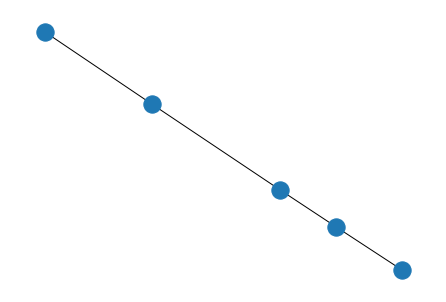

In [23]:
# basic graph drawing capability
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(G)